Compute streamfunction by solving the poisson equation

In [1]:
from xinvert import invert_Poisson
import xarray as xr

In [2]:
directory = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/'
filename = 'relative_vorticity_test.nc'
ds = xr.open_dataset(directory + filename)

In [3]:
ds

<xarray.Dataset>
Dimensions:       (x_f: 802, y_f: 3183)
Coordinates:
    time_instant  object ...
    t             object ...
  * x_f           (x_f) float64 0.5 1.5 2.5 3.5 4.5 ... 798.5 799.5 800.5 801.5
    gdept_1d      float64 ...
    z_c           int64 ...
  * y_f           (y_f) float64 0.5 1.5 2.5 3.5 ... 3.18e+03 3.182e+03 3.182e+03
    glamf         (y_f, x_f) float64 ...
    gphif         (y_f, x_f) float64 ...
Data variables:
    vor           (y_f, x_f) float64 ...

I don't think xinvert works for curvilinear grids... or at least does not enable the input of the lat and lon coordinates as 2d fields.

Let's make a new dataset appropriate for xinvert.

In [11]:
# create dataset for xnemo readable
ds_tmp = xr.Dataset(
    data_vars={
        'vor': (["y_f", "x_f"], 
                ds.vor.values,
                 {"standard_name": "relative_vorticity"}),
    },
    coords={
        "y_f": (["y_f"], ds.gphif.isel(x_f=400).values, 
                  {"standard_name": "Latitude", "units": "degrees_north"}),
        "x_f": (["x_f"], ds.glamf.isel(y_f=1000).values, 
                  {"standard_name": "Longitude","units": "degrees_east"}),
    },
    attrs={
        "name": "NEMO dataset",
        "description": "Contains relative vorticity -> ocean F grid variables",
    },
)

In [12]:
ds_tmp

<xarray.Dataset>
Dimensions:  (y_f: 3183, x_f: 802)
Coordinates:
  * y_f      (y_f) float64 -69.99 -69.97 -69.95 -69.93 ... 69.97 69.99 70.01
  * x_f      (x_f) float64 0.0 0.0625 0.125 0.1875 ... 49.88 49.94 50.0 50.06
Data variables:
    vor      (y_f, x_f) float64 0.0 6.445e-06 1.224e-05 ... 0.0 0.0 0.0
Attributes:
    name:         NEMO dataset
    description:  Contains relative vorticity -> ocean F grid variables

In [13]:
iParams = {
    'BCs'      : ['extend', 'periodic'],
    'mxLoop'   : 1000,
    'tolerance': 1e-12,
}

sf = invert_Poisson(ds_tmp.vor, dims=['y_f','x_f'], iParams=iParams)

Exception: coordinate y_f is non-uniform:
<xarray.DataArray 'y_f' (y_f: 3183)>
array([-69.991203, -69.969807, -69.948389, ...,  69.969807,  69.991203,
        70.012578])
Coordinates:
  * y_f      (y_f) float64 -69.99 -69.97 -69.95 -69.93 ... 69.97 69.99 70.01
Attributes:
    standard_name:  Latitude
    units:          degrees_north

In [6]:
sf

<xarray.DataArray 'inverted' (y_f: 3183, x_f: 802)>
array([[3.00596432e+08, 3.01016939e+08, 3.01427524e+08, ...,
        2.99899655e+08, 3.00227610e+08, 3.00573217e+08],
       [3.00938038e+08, 3.01358508e+08, 3.01769001e+08, ...,
        3.00241463e+08, 3.00569304e+08, 3.00914821e+08],
       [3.01247039e+08, 3.01661472e+08, 3.02065957e+08, ...,
        3.00589985e+08, 3.00901378e+08, 3.01239091e+08],
       ...,
       [3.49005413e+08, 3.48713194e+08, 3.48571520e+08, ...,
        3.50427251e+08, 3.50082044e+08, 3.49626577e+08],
       [3.50142327e+08, 3.50120816e+08, 3.50321546e+08, ...,
        3.52465929e+08, 3.51447732e+08, 3.50799546e+08],
       [3.49815194e+08, 3.49793533e+08, 3.49994066e+08, ...,
        3.52138764e+08, 3.51120621e+08, 3.50472399e+08]])
Coordinates:
    time_instant  object 0062-03-02 00:00:00
    t             object 0062-03-02 00:00:00
  * x_f           (x_f) float64 0.5 1.5 2.5 3.5 4.5 ... 798.5 799.5 800.5 801.5
    gdept_1d      float64 5.034
    z_c           int64 0
  * y_f           (y_f) float64 0.5 1.5 2.5 3.5 ... 3.18e+03 3.182e+03 3.182e+03
    glamf         (y_f, x_f) float64 0.0 0.0625 0.125 ... 49.94 50.0 50.06
    gphif         (y_f, x_f) float64 -69.99 -69.99 -69.99 ... 70.01 70.01 70.01

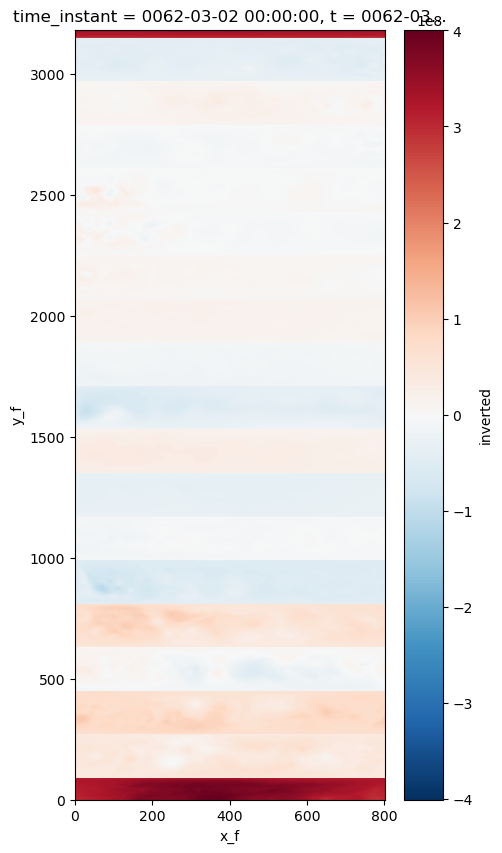

In [7]:
sf.plot(figsize=(5,10))